<a href="https://colab.research.google.com/github/sheinri/Compartmental-Modelling/blob/main/reorganized_aug6_ver2_sh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import math
from scipy.optimize import NonlinearConstraint

In [ ]:
## Load Data
A = list()
B = list()

#0
A.append([np.float64(1565.5019164496136), np.float64(1650.603210796356), np.float64(2273.9821202819085), np.float64(2945.1022521364976), np.float64(3305.894463726113), np.float64(3976.4268948673985), np.float64(4502.688512608195), np.float64(4910.571983777649), np.float64(5558.703036775007), np.float64(5954.626015783286), np.float64(6337.858053780564), np.float64(6404.428609095438), np.float64(6495.329226134249), np.float64(6835.081737186041), np.float64(7077.770244493273)])
B.append([np.float64(1600.4980835503864), np.float64(1971.3967892036442), np.float64(2194.017879718091), np.float64(2268.8977478635024), np.float64(2319.105536273887), np.float64(2587.5731051326015), np.float64(2718.311487391805), np.float64(2809.428016222352), np.float64(2891.2969632249924), np.float64(3135.3739842167156), np.float64(3250.141946219436), np.float64(3418.5713909045617), np.float64(3416.67077386575), np.float64(3171.918262813959), np.float64(2942.229755506727)])
#1
A.append([np.float64(1698.1807350546555), np.float64(1842.2977454563172), np.float64(2477.0671938007895), np.float64(3181.301286429687), np.float64(3545.5943106289096), np.float64(4129.031862045344), np.float64(4675.027229800468), np.float64(5146.654650896011), np.float64(5575.228022835968), np.float64(5892.151683862253), np.float64(6217.192820579036), np.float64(6135.691153265037), np.float64(6556.932041319456), np.float64(6497.359084103348), np.float64(6393.623808913442)])
B.append([np.float64(1433.8192649453442), np.float64(1687.7022545436828), np.float64(1886.9328061992107), np.float64(1936.6987135703134), np.float64(1948.4056893710904), np.float64(2214.9681379546555), np.float64(2282.9727701995316), np.float64(2342.345349103989), np.float64(2471.771977164032), np.float64(2670.848316137746), np.float64(2759.8071794209623), np.float64(2856.308846734963), np.float64(2734.0679586805436), np.float64(2914.6409158966503), np.float64(3029.3761910865583)])
#2
A.append([np.float64(1326.3178380906215), np.float64(1517.6560976522114), np.float64(1797.6286397552594), np.float64(2033.871960381928), np.float64(2302.8560780087473), np.float64(2581.4763173854017), np.float64(2807.409045519246), np.float64(2980.126841697681), np.float64(3340.750284129781), np.float64(3560.229137808585), np.float64(3733.418625983378), np.float64(4031.6557537868084), np.float64(4381.259482357013), np.float64(4543.463732507704), np.float64(4667.242997661253)])
B.append([np.float64(1207.6821619093787), np.float64(1509.3439023477888), np.float64(1794.3713602447401), np.float64(1931.128039618072), np.float64(2168.1439219912522), np.float64(2336.5236826145983), np.float64(2531.5909544807537), np.float64(2660.873158302319), np.float64(2846.24971587022), np.float64(2982.770862191415), np.float64(3108.581374016621), np.float64(3231.3442462131916), np.float64(3344.7405176429875), np.float64(3269.536267492295), np.float64(3347.757002338747)])
#3
A.append([np.float64(110.7356789267013), np.float64(115.47130457596195), np.float64(150.25777424070722), np.float64(169.18923020055675), np.float64(209.6685054472622), np.float64(225.40135014777184), np.float64(263.61051054827885), np.float64(293.7187830592833), np.float64(320.5764917043185), np.float64(366.596994471432), np.float64(454.16354201682935), np.float64(580.6196034377026), np.float64(722.8072498839247), np.float64(833.4564463700057), np.float64(867.4949032454398)])
B.append([np.float64(519.2643210732987), np.float64(539.5286954240381), np.float64(577.7422257592928), np.float64(712.8107697994433), np.float64(734.3314945527378), np.float64(783.598649852228), np.float64(895.3894894517213), np.float64(1004.2812169407167), np.float64(1064.4235082956816), np.float64(1138.403005528568), np.float64(1172.8364579831707), np.float64(1317.3803965622976), np.float64(1276.192750116075), np.float64(1292.5435536299944), np.float64(1256.50509675456)])
#4
A.append([np.float64(1887.7207929536232), np.float64(2223.975188939359), np.float64(2916.5663472835963), np.float64(3370.550589353261), np.float64(3486.4463256201025), np.float64(4089.10643933727), np.float64(5166.351234665039), np.float64(5714.349025452006), np.float64(6518.430780187868), np.float64(7009.221716669602), np.float64(7711.844824445791), np.float64(8749.938771124314), np.float64(8632.603362058275), np.float64(8759.00757451948), np.float64(8507.67059560107)])
B.append([np.float64(1306.279207046377), np.float64(1636.024811060641), np.float64(1856.433652716404), np.float64(1913.4494106467394), np.float64(2332.553674379897), np.float64(2841.8935606627306), np.float64(2983.6487653349623), np.float64(3258.6509745479943), np.float64(3397.5692198121315), np.float64(3675.7782833303986), np.float64(3860.155175554211), np.float64(3969.0612288756865), np.float64(4274.396637941727), np.float64(4525.992425480519), np.float64(4778.32940439893)])
#5
A.append([np.float64(1325.7008278251985), np.float64(1468.1040963583623), np.float64(1589.9636977864682), np.float64(1574.7953131175484), np.float64(1861.37247284352), np.float64(2139.4956277440974), np.float64(2435.663326397258), np.float64(2677.2344111240313), np.float64(2567.4904625654503), np.float64(2410.4058205075944), np.float64(2525.680769583509), np.float64(2497.9416674947356), np.float64(2272.6548712573535), np.float64(2066.8457342593233), np.float64(1830.9204245611254)])
B.append([np.float64(2019.2991721748015), np.float64(1983.8959036416375), np.float64(2013.0363022135318), np.float64(2185.2046868824514), np.float64(2172.6275271564796), np.float64(2284.5043722559026), np.float64(2442.3366736027424), np.float64(2469.7655888759687), np.float64(2615.5095374345497), np.float64(2771.594179492406), np.float64(2746.3192304164904), np.float64(2800.0583325052644), np.float64(3023.3451287426465), np.float64(3179.1542657406767), np.float64(3417.0795754388746)])

## Error
uncert = [[[np.float64(1830.4907863541182), np.float64(1670.8555234732946), np.float64(2344.553546001593), np.float64(798.6653605375894), np.float64(800.3104691996439), np.float64(905.2755050604088), np.float64(1369.6855416839535), np.float64(5816.12459720699), np.float64(3152.8544994884405), np.float64(2874.021841803227), np.float64(2400.5963355800604), np.float64(2687.282766773417), np.float64(11626.707660725868), np.float64(16327.094457686067), np.float64(16289.566943472799)], [np.float64(1144.0567413980725), np.float64(1198.9108200949108), np.float64(1419.7024664150074), np.float64(432.50771081367697), np.float64(428.78479022283955), np.float64(474.9999181954779), np.float64(567.9316109108621), np.float64(1730.1151222027147), np.float64(820.6623830579107), np.float64(659.9178029407168), np.float64(512.2412644417502), np.float64(423.6773062955972), np.float64(1854.513735538467), np.float64(2461.0862685045313), np.float64(2500.0279962804257)]], [[np.float64(787.0706903962009), np.float64(366.95477145869876), np.float64(417.36853568959214), np.float64(270.04169362021514), np.float64(299.82323148854374), np.float64(489.2679941170912), np.float64(999.6803688860344), np.float64(1638.5922998641395), np.float64(1559.7476987356504), np.float64(1547.5926902188303), np.float64(1039.5693309292662), np.float64(1109.226039705766), np.float64(1509.8333550530717), np.float64(3922.8508470061474), np.float64(4595.032831989453)], [np.float64(398.66612832036435), np.float64(219.2438327970547), np.float64(284.4070444367952), np.float64(216.19333379180162), np.float64(238.0243136135764), np.float64(375.5937599285054), np.float64(677.4818683443086), np.float64(966.8729743800196), np.float64(868.5547337110877), np.float64(963.0755063437), np.float64(645.3671226390704), np.float64(640.9293796383762), np.float64(723.818142977506), np.float64(2033.1166674035671), np.float64(2462.711367197587)]], [[np.float64(1122.3756859198106), np.float64(1277.0391642311956), np.float64(1058.3748692835786), np.float64(1526.4413173773216), np.float64(1615.9695446458718), np.float64(4746.500601922522), np.float64(2466.2807009269904), np.float64(3926.8320457448726), np.float64(4396.041453569238), np.float64(5104.267045283004), np.float64(3618.2493159111696), np.float64(5185.803354567712), np.float64(4907.524957244653), np.float64(4393.695130628041), np.float64(4743.996746400051)], [np.float64(982.078725179833), np.float64(1114.7102124977007), np.float64(749.7840870157454), np.float64(875.6860547204872), np.float64(877.5192920104473), np.float64(2152.1440032307073), np.float64(1056.0740318385886), np.float64(1606.2356648240182), np.float64(1583.0167057571025), np.float64(1560.3084685719648), np.float64(979.0032584732724), np.float64(1329.387711700226), np.float64(1238.456029826995), np.float64(1158.8533009149392), np.float64(1174.2098113585555)]], [[np.float64(1222.4147935367153), np.float64(1011.3454396859998), np.float64(1101.876617677496), np.float64(918.0625555500036), np.float64(1071.3338546485668), np.float64(1589.7721741343805), np.float64(1676.7959686476847), np.float64(2386.692076986545), np.float64(3507.6152681187796), np.float64(5809.316008857375), np.float64(6504.22402821288), np.float64(5358.858747523903), np.float64(4775.1094923409055), np.float64(4648.498480334804), np.float64(5738.186213366417)], [np.float64(1069.612944344616), np.float64(882.7897542669692), np.float64(782.026393827068), np.float64(525.9518511600795), np.float64(584.8359019622957), np.float64(731.6957415489939), np.float64(732.8719308175885), np.float64(872.539136143), np.float64(1105.5507964572425), np.float64(1635.6764157708665), np.float64(1560.5008413423811), np.float64(1197.6784246604013), np.float64(981.1341930836222), np.float64(974.9927063260657), np.float64(1226.6146226455185)]], [[np.float64(389.5712525764718), np.float64(450.6616498819959), np.float64(347.8872437804724), np.float64(684.6450864572498), np.float64(965.3786010358916), np.float64(2296.000398775104), np.float64(1986.4864894858897), np.float64(2797.3973027585293), np.float64(1817.8294604604382), np.float64(2986.955122240039), np.float64(2980.4223642480492), np.float64(4051.395101175651), np.float64(2522.2258070629323), np.float64(2636.764470942398), np.float64(2488.6608746715)], [np.float64(487.3822602024743), np.float64(531.30732860557), np.float64(401.02723809579174), np.float64(742.4895452256283), np.float64(896.5844770835018), np.float64(1948.750408494903), np.float64(1616.50616468685), np.float64(2071.307977684809), np.float64(1300.1891322777358), np.float64(1797.8653502678847), np.float64(1685.2377461081237), np.float64(2285.2708160085763), np.float64(1193.0608863137318), np.float64(1098.4071662977244), np.float64(981.8996452752679)]], [[np.float64(221.55317360283902), np.float64(154.23880219390603), np.float64(171.71707611543735), np.float64(282.3451488472918), np.float64(235.01833650811), np.float64(461.1055205974063), np.float64(517.0690281886657), np.float64(701.1129982413993), np.float64(749.5482521437716), np.float64(601.496572208649), np.float64(906.3483993255027), np.float64(1047.3880844043283), np.float64(976.494150370927), np.float64(1236.9525459442882), np.float64(1015.1658387124679)], [np.float64(288.9722005363389), np.float64(303.3056821207433), np.float64(290.82608170286875), np.float64(464.9066313454563), np.float64(386.04405532707295), np.float64(755.5881768017397), np.float64(687.6576723218328), np.float64(785.1739302414443), np.float64(905.2145760491333), np.float64(664.1798125992507), np.float64(836.1012392291034), np.float64(804.9162420659501), np.float64(696.820367364553), np.float64(766.7403337526266), np.float64(676.824017684567)]]]


def getData(cell_line):
    if(cell_line == "Resistant"):
        #Resistant Control cell line
        G2 = B[0]
        G1 = A[0]
        # Initial values
        # EW lowered the intial values to improve the fit for the control unirradiated cells for resistant line%
        #G1S_0 = G1[0]#*0.85
        #G2M_0 = G2[0]#*0.9
        #D_0 = 0
    elif(cell_line == "Sensitive_C"):
        #Sensitive Control cell line
        G2 = B[4]
        G1 = A[4]
        sigma = uncert[4]
        #G1S_0 = G1[0]
        #G2M_0 = G2[0]
        #D_0 = 0
    elif(cell_line == "Sensitive_T"):
        #Sensitive Treated cell line
        G2 = B[5]
        G1 = A[5]
        sigma = uncert[5]
        #G1S_0 = G1[0]
        #G2M_0 = G2[0]
        #D_0 = 0
    elif(cell_line == "Intermediate"):
        G2 = B[2]
        G1 = A[2]
    return [G1,G2,sigma]

In [ ]:
def f_S(t, U, K, mu, beta, gamma,delta,rho,mortType):
    '''
    Integrant of system of ODEs.
    '''
    G1S,G2M, D, = U
    N = G1S + G2M

    if mortType == "pow_j":
        theta_a = gamma*(t**(beta+mu))
        theta_b = delta*(t**(mu+beta))
    elif mortType == "pow_i":
        theta_a = gamma*t**(beta)
        theta_b = delta*t**(mu)
    elif mortType == "exp_j":
        theta_a = gamma*np.exp((beta + mu)*t)
        theta_b = delta*np.exp((beta + mu)*t)
    elif mortType == "exp_i":
        theta_a = gamma*np.exp(beta*t)
        theta_b = delta*np.exp(mu*t)
    elif mortType == "constant": #Constant
        theta_a = gamma
        theta_b = delta
    elif mortType =="null":
        theta_a = 0
        theta_b = 0

    lambda_a = beta*(1-N/K)
    lambda_b = mu*(1-N/K)

    c1 = rho

    dG1Sdt = -lambda_a*G1S**c1 + 2*lambda_b*G2M - theta_a*G1S
    dG2Mdt = lambda_a*G1S**c1 - lambda_b*G2M - theta_b*G2M
    dDdt = theta_b*G2M + theta_a*G1S

    return [dG1Sdt,dG2Mdt,dDdt]

def event_threshold(t, C_m, interval):
    '''
    Event threshold causes integration to stop once measured data begins decreasing.
    Event threshold is only used when considering the controlled case.
    '''
    t_cur = int(np.round(t/interval))
    if t_cur<(len(C_m)-1):
        t_diff = C_m[t_cur+1] - C_m[t_cur]
    else:
        t_diff = 1
    if t_diff<= 0:
        return 0
    return 1

def SSE_calc (G1_m, G2_m, C_m, G1_e,G2_e,C_e,n_t, weight):

    m_temp = [G1_m,G2_m,C_m]
    e_temp = [G1_e,G2_e,C_e]

    LSE_min = 0
    for j in range(3):
        for i in range(n_t):
            LSE_min += weight[j][i]*(m_temp[j][i] - e_temp[j][i])**2

    return LSE_min

def AIC_calc (G1_m, G2_m, C_m, G1_e,G2_e,C_e,n_t,num_param, weight,sigma = 0):

    MLE_min = 0

    m_temp = [G1_m,G2_m,C_m]
    e_temp = [G1_e,G2_e,C_e]
    #weight = [[1]*n_t,[1]*n_t,[1]*n_t[1]]

    for j in range(3):
        for i in range(n_t):
            MLE_min += np.log(2*np.pi*m_temp[j][i]) + weight[j][i]*(m_temp[j][i] - e_temp[j][i])**2/m_temp[j][i]
            #MLE_min += np.log(2*np.pi*sigma[j][i]**2) + weight[j][i]*(m_temp[j][i] - e_temp[j][i])**2/sigma[j][i]**2

    MLE_min = 0.5*MLE_min
    AICc = MLE_min + 2*num_param*n_t*3/(n_t*3 - num_param - 1)
    return AICc

def drive(params,args):

    if(args[0]==0):
        K, mu, beta, G1S_0,G2M_0,D_0 = params
        rho = 1
        gamma = 0
        delta = 0
    elif(args[1] == 1):
        mu, beta, gamma,delta,rho,G1S_0,G2M_0,D_0 = params
        K = args[7]
    else:
        mu, beta, gamma,delta,G1S_0,G2M_0,D_0 = params
        K = args[7]
        rho = 1

    mortType = args[2]
    y0 = [G1S_0,G2M_0,D_0]
    tspan = args[3]

    G1_m = args[4]
    G2_m = args[5]
    C_m = np.array(G1_m) + np.array(G2_m)
    n_t = len(tspan)
    weight = args[6]

    #sol = solve_ivp(lambda t, U: f_S(t, U, K, mu, beta, gamma,delta,rho,mortType),[tspan[0], tspan[-1]], y0, t_eval=tspan, rtol = 1e-6, events=lambda t, U: event_threshold(t,C_m,6))
    sol = solve_ivp(lambda t, U: f_S(t, U, K, mu, beta, gamma,delta,rho,mortType),[tspan[0], tspan[-1]], y0, t_eval=tspan, rtol = 1e-6)
    G1S_y = sol.y[0]
    G2M_y = sol.y[1]
    C_e  = G1S_y + G2M_y

    return SSE_calc(G1_m,G2_m,C_m,G1S_y,G2M_y,C_e,n_t,weight)

def setup(param,bnds,tag):

    #tag = [0,0,"A"] # [fixed K,fixed rho, mortType]
    ## [0,0,""] - control_drive
    ## [1,0,""] - treated_drive1
    ## [1,1,""] - treated_drive2

    result = minimize(drive, param ,args = tag, method ='Nelder-Mead' ,bounds=bnds,tol=1e-4)

    return result


def initialize_rates(tag,interval,Control_Case_Param):

    G1_m = np.array(tag[4])
    G2_m = np.array(tag[5])
    C_m = G1_m + G2_m

    dNdt = (C_m[1:] - C_m[:-1])/interval
    dBdt = (G2_m[1:] - G2_m[:-1])/interval
    dAdt = (G1_m[1:] - G1_m[:-1])/interval

    mu = 0
    beta = 0

    gamma = 0
    delta = 0

    rho = 1

    if(tag[0] == 0): #Control Case
        K = np.max(C_m)
        x = G2_m[:-1]*(1-C_m[:-1]/K)
        x_t = x[:,np.newaxis]
        y = dNdt
        coefficients, residuals, rank, s = np.linalg.lstsq(x_t, y, rcond=None)
        mu = np.abs(coefficients[0])

        x = G1_m[:-1]*(1-C_m[:-1]/K)
        x_t = x[:,np.newaxis]
        y = 2*dBdt - dAdt
        coefficients, residuals, rank, s = np.linalg.lstsq(x_t, y, rcond=None)
        beta = np.abs(coefficients[0])

    mortType = tag[2]
    t = tag[3][:-1]

    if(tag[0] == 1):
        K,mu,beta = Control_Case_Param[:3]

        if mortType == "pow_j":
            theta_a = (t**(beta+mu))
            theta_b = (t**(mu+beta))
        elif mortType == "pow_i":
            theta_a = t**(beta)
            theta_b = t**(mu)
        elif mortType == "exp_j":
            theta_a = np.exp((beta + mu)*t)
            theta_b = np.exp((beta + mu)*t)
        elif mortType == "exp_i":
            theta_a = np.exp(beta*t)
            theta_b = np.exp(mu*t)
        elif mortType == "constant":
            theta_a = gamma
            theta_b = delta
        elif mortType =="null":
            theta_a = 0
            theta_b = 0

        x = G1_m[:-1]*theta_a
        x_t = x[:,np.newaxis]
        y = (2*mu*G2_m[:-1] - beta*G1_m[:-1])*(1-C_m[:-1]/K) - dAdt
        coefficients, residuals, rank, s = np.linalg.lstsq(x_t, y, rcond=None)
        gamma = np.abs(coefficients[0])


        K,mu,beta = Control_Case_Param[:3]
        x = G2_m[:-1]*theta_b
        x_t = x[:,np.newaxis]
        y = (0 - mu*G2_m[:-1] + beta*G1_m[:-1])*(1-C_m[:-1]/K) - dBdt
        coefficients, residuals, rank, s = np.linalg.lstsq(x_t, y, rcond=None)
        delta = np.abs(coefficients[0])

    return mu,beta,gamma,delta,rho



def plot_fit(G1,G2,C_m,sol,cell_line,tspan):

    fig, ax = plt.subplots()

    Y = sol.y[1] + sol.y[0]
    plt.title(f"Best Fit Model for {cell_line[0]} cell line: {cell_line[1]}")
    #plt.plot(sol.t, Y, label="Best fit with parameters: "+ f"\nβ = {round(beta,4)}, gamma = {round(gamma,5)}, delta = {round(delta,5)},G1(0) = {round(G1S_0)}, D(0) = {round(D_0)}, G2M(0) = {round(G2M_0)}, \nK = {K}, mu = {round(mu,4)}" , color = "green")
    plt.plot(sol.t, Y, label="Fitted Total Population" , color = '#F4FC4D')
    plt.scatter(tspan,C_m, label = "Observed Total Population",color = '#F4FC4D')

    t_idk = tspan
    ax.plot(sol.t,sol.y[0],label = "Fitted G1/S", color = "#91F63B")
    ax.scatter(t_idk,G1,label = "Observed G1/S", color = "#91F63B")
    ax.plot(sol.t,sol.y[1],label = "Fitted G2/M", color = "#DC010B")
    ax.scatter(t_idk,G2,label = "Observed G2/M", color = "#DC010B")
    #plt.plot(sol.t,sol.y[2],label = "D", color = "red")
    #plt.scatter(t_idk,Q,label = "obs Q", color = "red")


    ax.set_facecolor('0.8')
    ax.grid(True, color='#02005E',alpha=0.2, linestyle='-', linewidth=0.5) # draw grid for major ticks
    ax.grid(which='minor',color = '#02005E', alpha=0.05)

    ax.set_xlabel("Time in Hours")
    ax.set_ylabel("Nucleus Count")
    font_prop = font_manager.FontProperties(size=7)
    plt.legend(prop=font_prop)
    plt.show()


In [ ]:
def run_model(cell_line,interval,mortType,weight_C,weight_T):
    ###### MAIN ######
    #cell_line = "Sensitive_T" #!User should adjust
    #interval = 6 #! User should adjust
    #mortType = "pow_j" #! User should adjust
    lines = [cell_line+"_C",cell_line+"_T"]
    weights = [weight_C,weight_T]
    Control_Case_Param = list()

    for line, i in zip(lines,range(2)):
        G1, G2, sigma = getData(line)
        cell_count = np.array(G1) + np.array(G2)
        tspan = np.arange(len(G1))*interval
        n_t = len(tspan)

        tag = [i,0,mortType,tspan,G1,G2,weights[i],np.max(cell_count)] #! User should adjust
        if i == 1:
            tag[7] = Control_Case_Param[0]

        bnds_ctrl = [(1000,1e5),(0,50),(0, 50),(10,1e5),(10,1e5),(0,0)] #! User should adjust

        #inital values
        G1S_0 = G1[0]
        G2M_0 = G2[0]
        D_0 = 0 #dead cells

        mu,beta,gamma,delta,rho = initialize_rates(tag,interval,Control_Case_Param)

        param = [mu, beta, G1S_0,G2M_0,D_0]

        #print("mu")
        #print(mu)
        #print("beta")
        #print(beta)

        if tag[0]:
            param.insert(2,delta)
            param.insert(3,gamma)
            bnds_ctrl = bnds_ctrl[1:3]*2 + bnds_ctrl[3:]
        else:
            param.insert(0,np.max(cell_count))

        if tag[1] == 1:
            param.insert(5,rho)

        result = setup(param,bnds_ctrl,tag)
        fitted_params = result.x

        if(tag[0]==0):
            K, mu, beta, G1S_0,G2M_0,D_0 = fitted_params
            Control_Case_Param = fitted_params
            print("K = {}, mu = {}, beta ={}, G1/S(0) = {}, G2/M(0) = {}. R = {}".format(*fitted_params))
        elif(tag[1] == 1):
            mu, beta, gamma,delta,rho,G1S_0,G2M_0,D_0 = fitted_params
        else:
            mu, beta, gamma,delta,G1S_0,G2M_0,D_0 = fitted_params
            print("mu = {}, beta ={},gamma = {},delta = {}, G1/S(0) = {}, G2/M(0) = {}. R = {}".format(*fitted_params))

        y0 = [G1S_0,G2M_0,D_0]

        sol = solve_ivp(lambda t, U: f_S(t, U, K, mu, beta, gamma,delta,rho,mortType),[tspan[0], tspan[-1]], y0, rtol = 1e-6)
        if(line[-1]== "C"):
          name_line = [line[:-2],"Control"]
        else:
          name_line = [line[:-2],"Treated"]
        plot_fit(G1,G2,cell_count,sol,name_line,tspan)

        weight = [[1]*n_t,[1]*n_t,[1]*n_t]
        AIC= AIC_calc (G1, G2, cell_count, sol.y[0],sol.y[1],sol.y[0]+sol.y[1],n_t,len(fitted_params)-1, weight)
        print("AIC:", AIC)

        import pandas as pd
        from plottable import Table

        d = pd.DataFrame(np.random.random((5, 5)), columns=["K", "mu", "beta", "gamma", "g"]).round(2)
        fig, ax = plt.subplots(figsize=(6, 5))
        tab = Table(d)

        plt.show()



Mortality Type: pow_j
K = 15481.900655494985, mu = 0.11832217969235692, beta =0.08480689481284233, G1/S(0) = 1778.8293583739478, G2/M(0) = 1220.7438244179066. R = 0.0


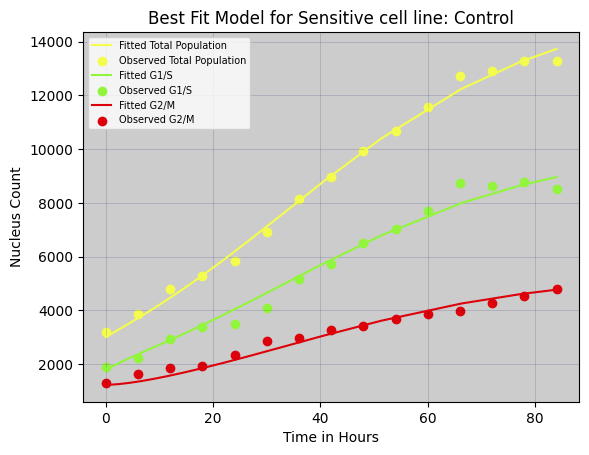

AIC: 24137.449712228474
mu = 0.08093568846227478, beta =0.12466667535075422,gamma = 0.02020375996952411,delta = 0.004595117735505911, G1/S(0) = 1210.7683823172256, G2/M(0) = 1805.366421904329. R = 0.0


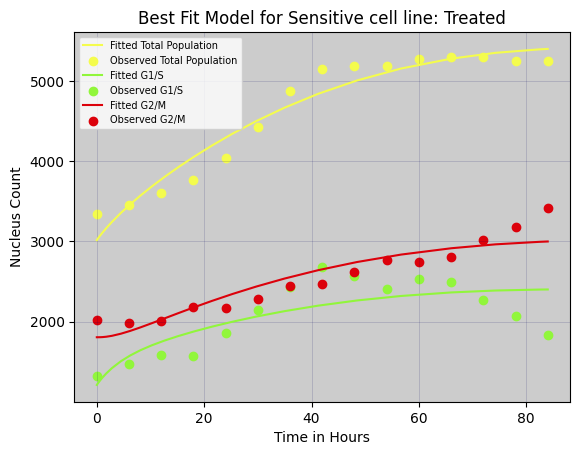

AIC: 9587.255672700672
Mortality Type: pow_i
K = 15481.900655494985, mu = 0.11832217969235692, beta =0.08480689481284233, G1/S(0) = 1778.8293583739478, G2/M(0) = 1220.7438244179066. R = 0.0


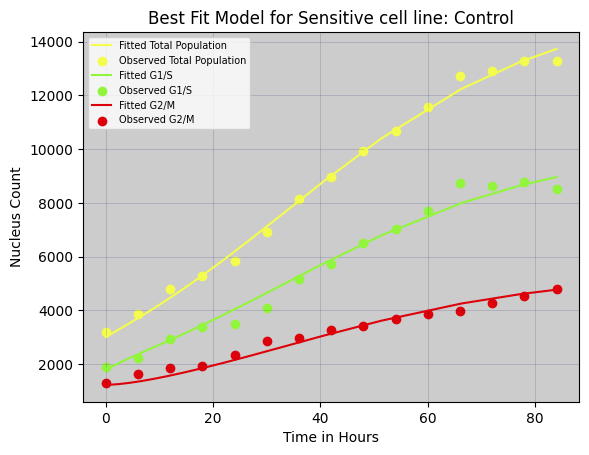

AIC: 24137.449712228474
mu = 0.09595970400689507, beta =0.15735977585313887,gamma = 0.02572102151720062,delta = 0.012659201627434738, G1/S(0) = 1220.2677429259973, G2/M(0) = 1805.3528030369334. R = 0.0


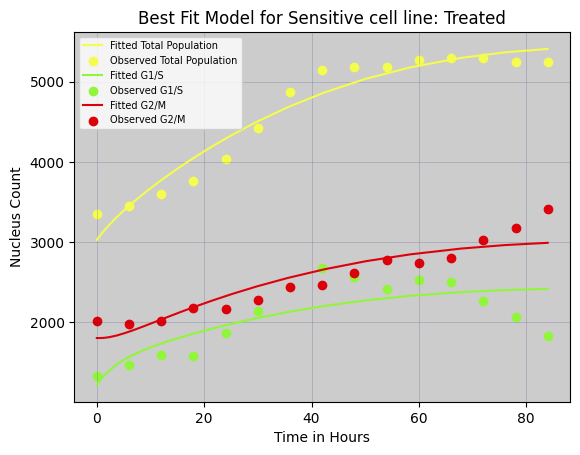

AIC: 9563.195105758505
Mortality Type: exp_i
K = 15481.900655494985, mu = 0.11832217969235692, beta =0.08480689481284233, G1/S(0) = 1778.8293583739478, G2/M(0) = 1220.7438244179066. R = 0.0


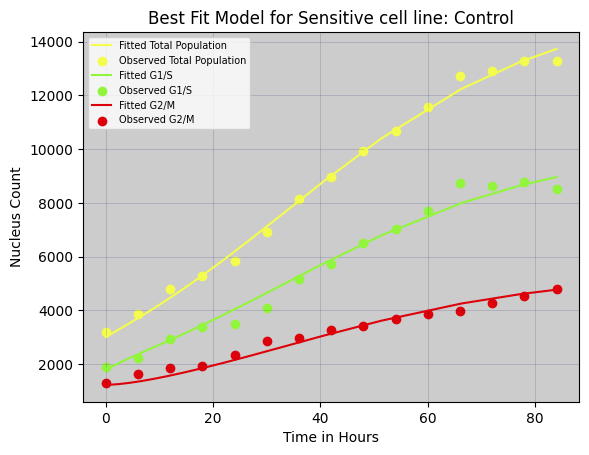

AIC: 24137.449712228474
mu = 0.030633827052239715, beta =0.0460170988533347,gamma = 0.0011496305658487025,delta = 0.0, G1/S(0) = 1200.9175510874554, G2/M(0) = 1951.7484927251883. R = 0.0


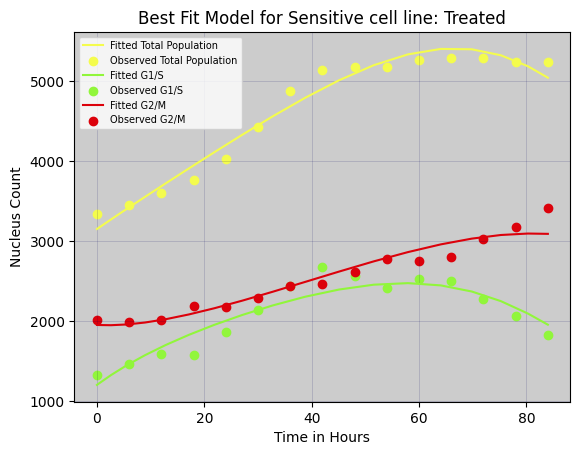

AIC: 2075.0718171655863
Mortality Type: constant
K = 15481.900655494985, mu = 0.11832217969235692, beta =0.08480689481284233, G1/S(0) = 1778.8293583739478, G2/M(0) = 1220.7438244179066. R = 0.0


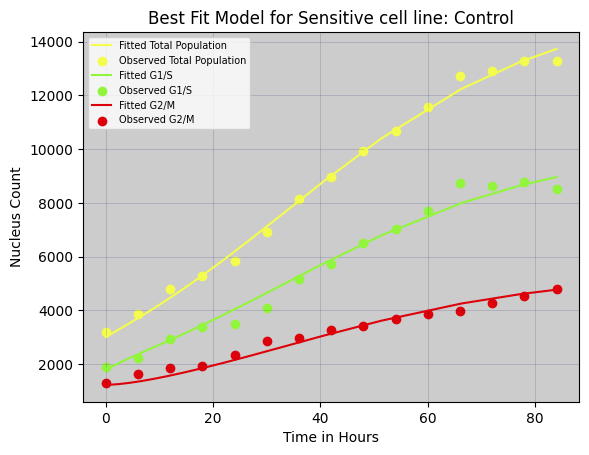

AIC: 24137.449712228474
mu = 0.1977070722376727, beta =0.38485718413753256,gamma = 0.058003986561493165,delta = 0.07806483083909194, G1/S(0) = 1258.791528122887, G2/M(0) = 1836.1659489220929. R = 0.0


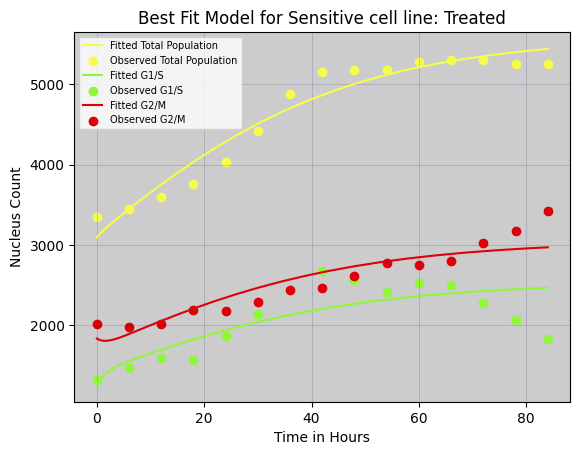

AIC: 6159.890613337345


In [ ]:
mortTypes = ["pow_j","pow_i","exp_i","constant"]

for mortType in mortTypes:
    print("Mortality Type:", mortType)
    cell_line = "Sensitive" #!User should adjust
    interval = 6 #! User should adjust
    #mortType = "pow_i" #! User should adjust
    n_t = 15 #! User should adjust

    weight_G1 = [0]*math.floor(n_t/3)+[0]*(n_t - 2*math.floor(n_t/3))+[1]*math.floor(n_t/3)
    weight_G2 = [0]*math.floor(n_t/3)+[0]*(n_t - 2*math.floor(n_t/3))+[1]*math.floor(n_t/3)
    weight_C = [1]*math.floor(n_t/3)+[1]*(n_t - 2*math.floor(n_t/3))+[1]*math.floor(n_t/3)
    weight_temp = [1]*n_t
    weight  = [weight_temp,weight_temp,weight_temp] #! User should adjust

    weight_C = weight
    weight_T = weight

    run_model(cell_line,interval,mortType,weight_C,weight_T)